In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv("smart_grid_stability_augmented.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [99]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


In [100]:
map1={'unstable':0,'stable':1}
df['stabf']=df['stabf'].replace(map1)
df=df.sample(frac=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
22572,0.878849,5.407999,4.569334,3.606439,3.347687,-1.691827,-1.057733,-0.598128,0.452031,0.268055,0.371326,0.875940,-0.007978,1
56514,6.449855,6.620205,9.340290,5.575226,2.690556,-1.264869,-0.917334,-0.508353,0.427885,0.774798,0.673763,0.064580,0.051095,0
12064,7.679518,8.409500,2.951306,4.404178,2.596802,-0.989915,-0.979200,-0.627688,0.723084,0.560064,0.166100,0.343462,0.034924,0
36408,6.368253,9.884245,8.442731,9.129394,4.247885,-0.582664,-1.713285,-1.951936,0.135608,0.392424,0.866100,0.264535,0.043272,0
39589,5.220915,5.933395,5.652744,9.571906,3.487037,-0.755873,-1.320742,-1.410422,0.371090,0.553493,0.566453,0.981270,0.065804,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 22572 to 47407
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 6.9 MB


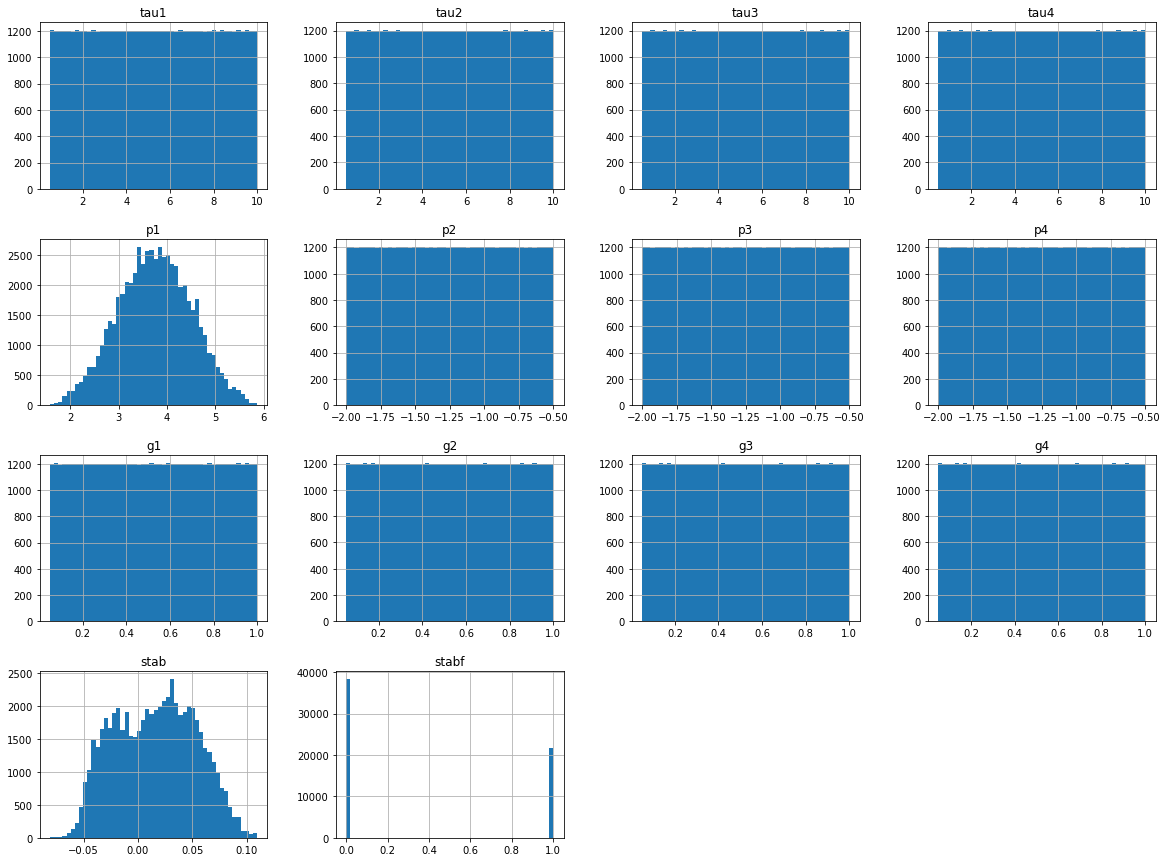

In [102]:
#visualisation of dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

In [118]:
X=df.iloc[ : , :12]
y=df.iloc[ : , 13]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True,random_state=1)

In [119]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
22572,0.878849,5.407999,4.569334,3.606439,3.347687,-1.691827,-1.057733,-0.598128,0.452031,0.268055,0.371326,0.875940
56514,6.449855,6.620205,9.340290,5.575226,2.690556,-1.264869,-0.917334,-0.508353,0.427885,0.774798,0.673763,0.064580
12064,7.679518,8.409500,2.951306,4.404178,2.596802,-0.989915,-0.979200,-0.627688,0.723084,0.560064,0.166100,0.343462
36408,6.368253,9.884245,8.442731,9.129394,4.247885,-0.582664,-1.713285,-1.951936,0.135608,0.392424,0.866100,0.264535
39589,5.220915,5.933395,5.652744,9.571906,3.487037,-0.755873,-1.320742,-1.410422,0.371090,0.553493,0.566453,0.981270


In [120]:
y

22572    1
56514    0
12064    0
36408    0
39589    0
        ..
28782    1
28011    0
44652    0
46046    1
47407    0
Name: stabf, Length: 60000, dtype: int64

In [121]:
len(X_test)

18000

In [122]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [123]:
y_pred=lg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [124]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

TN,FP,FN,TP=confusion_matrix(y_test,y_pred).ravel()

print('TP = ', TP)
print('FP = ', FP)
print('TN = ', TN)
print('FN = ', FN)
acc=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy ={:0.3f}'.format(acc))


TP =  4524
FP =  1423
TN =  10106
FN =  1947
Accuracy =0.813


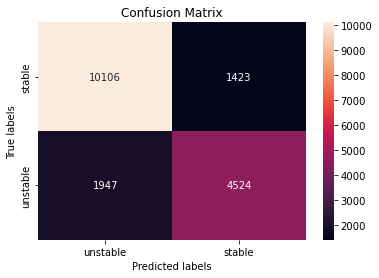

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['unstable', 'stable']); ax.yaxis.set_ticklabels(['stable', 'unstable']);

In [126]:
from sklearn.metrics import accuracy_score, classification_report
ac=accuracy_score(y_test,y_pred)
print('Accuracy ={:0.3f}'.format(ac))

print(classification_report(y_test, y_pred,target_names=['unstable','stable']))

Accuracy =0.813
              precision    recall  f1-score   support

    unstable       0.84      0.88      0.86     11529
      stable       0.76      0.70      0.73      6471

    accuracy                           0.81     18000
   macro avg       0.80      0.79      0.79     18000
weighted avg       0.81      0.81      0.81     18000

